In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze data

In [2]:
df = pd.read_csv("salaries_cyber_us_cleaned.csv", index_col=0)

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_size
0,2023,MI,FT,Security Analyst,145000,US,0,M
1,2023,MI,FT,Security Analyst,115000,US,0,M
2,2023,SE,FT,DevSecOps,160000,US,0,M
3,2023,SE,FT,DevSecOps,120000,US,0,M
6,2023,SE,FT,Security Specialist,104000,US,100,M


In [4]:
df = df[df["employment_type"] == "FT"]

In [12]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_size
0,2023,MI,FT,Security Analyst,145000,US,0,M
1,2023,MI,FT,Security Analyst,115000,US,0,M
2,2023,SE,FT,DevSecOps,160000,US,0,M
3,2023,SE,FT,DevSecOps,120000,US,0,M
6,2023,SE,FT,Security Specialist,104000,US,100,M


In [7]:
df.employment_type.unique()

array(['FT'], dtype=object)

In [6]:
df.employee_residence.unique()

array(['US', 'CA', 'ES', 'GB', 'IN', 'CZ', 'JO', 'PT', 'FR', 'PK', 'GH',
       'DE', 'CR', 'JP', 'AE', 'NL', 'BR', 'GR', 'AU'], dtype=object)

## Let's look at the correlation

<AxesSubplot: title={'center': 'U.S. Cyber Salaries'}, xlabel='Company Size', ylabel='Salary'>

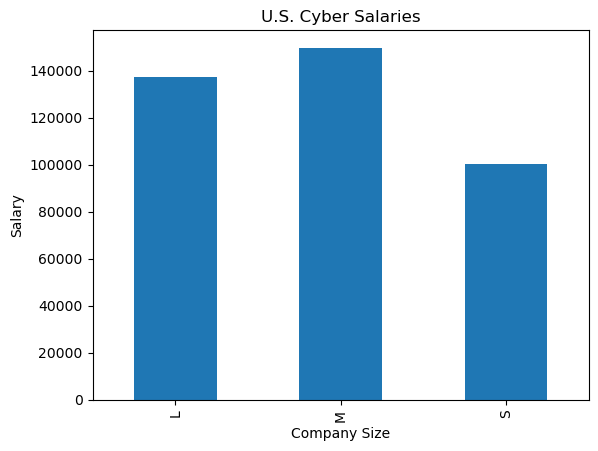

In [16]:
df.groupby("company_size").mean().loc[:, "salary"].plot(kind="bar", xlabel="Company Size", ylabel="Salary", title="U.S. Cyber Salaries")

The mean salary at medium sized companies is the highest, while at small sized companies it is the lowest. 

Let's check which experience levels there are:

[Text(0.5, 0, 'Company Size'),
 Text(0, 0.5, 'Salary'),
 Text(0.5, 1.0, 'U.S. Cyber Salaries')]

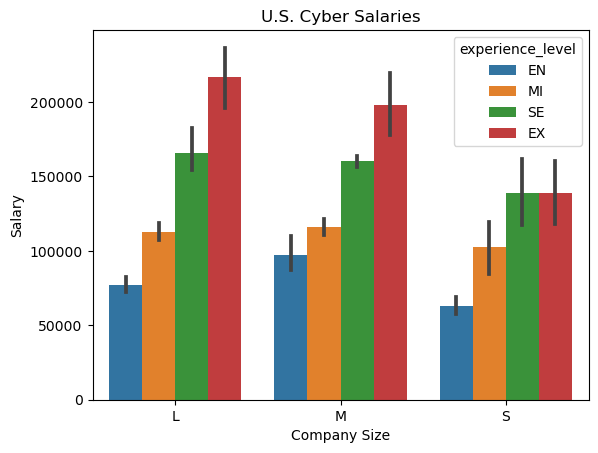

In [22]:
ax = sns.barplot(
    data = df,
    x = "company_size",
    y = "salary",
    hue = "experience_level",
    order = ["L", "M", "S"],
    hue_order= ["EN", "MI", "SE", "EX"],
)

ax.set(xlabel="Company Size", ylabel="Salary", title="U.S. Cyber Salaries")

<AxesSubplot: xlabel='experience_level,company_size'>

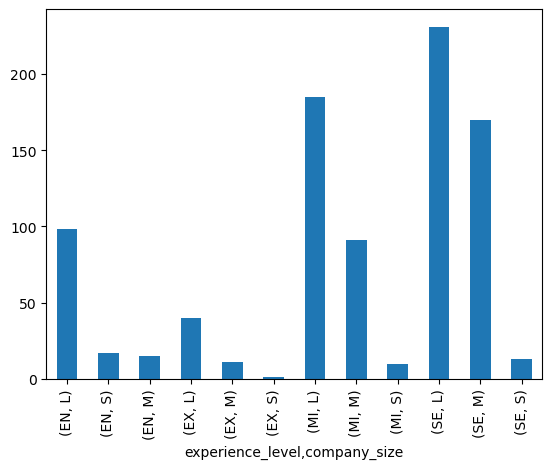

In [65]:
df.loc[:, ["experience_level", "company_size"]].groupby("experience_level").value_counts().plot(kind="bar")

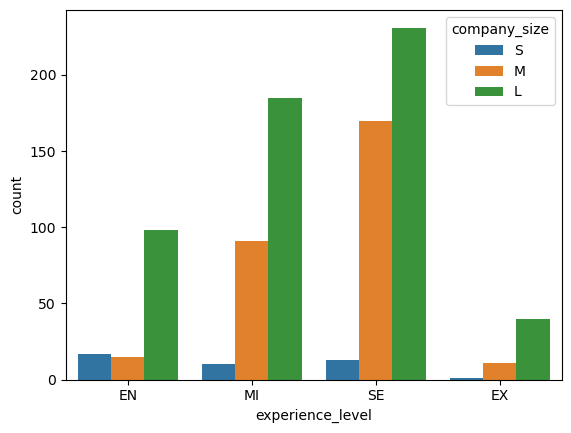

In [66]:
sns.countplot(
    data=df,
    x="experience_level",
    hue="company_size",
    order=["EN", "MI", "SE", "EX"]
);

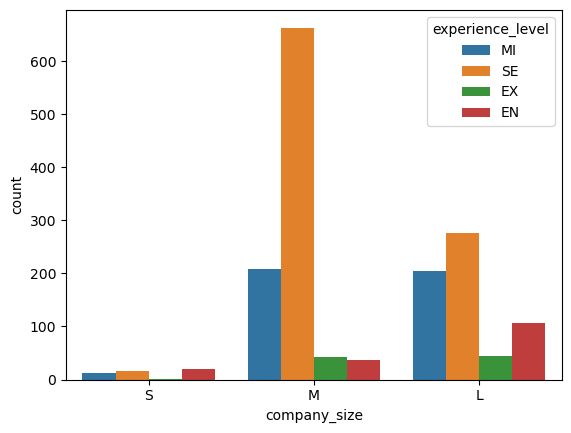

In [23]:
sns.countplot(
    data=df,
    x="company_size",
    hue="experience_level",
    order=["S", "M", "L"]
);

There is less executive-level data available in smaller companies.

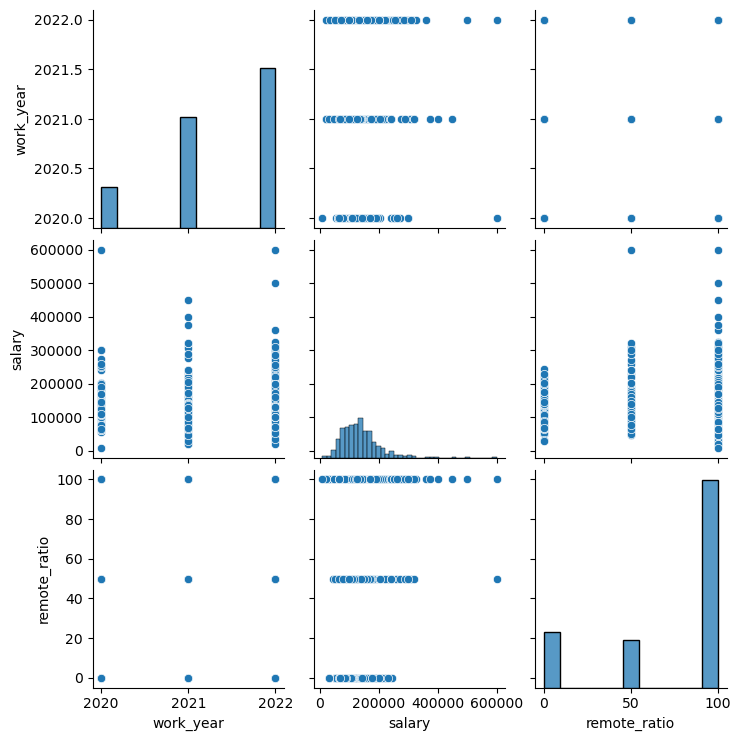

In [68]:
sns.pairplot(df);

## How has the salary change between 2020 and 2022?

In [49]:
mean_salary_per_year = df.loc[:, ["work_year", "salary"]].groupby("work_year").mean()
mean_salary_per_year.head()

,salary
work_year,
2020,128650.814159
2021,121887.888535
2022,146953.067776
2023,158255.890110


Text(0.5, 1.0, 'U.S. Cyber Salaries')

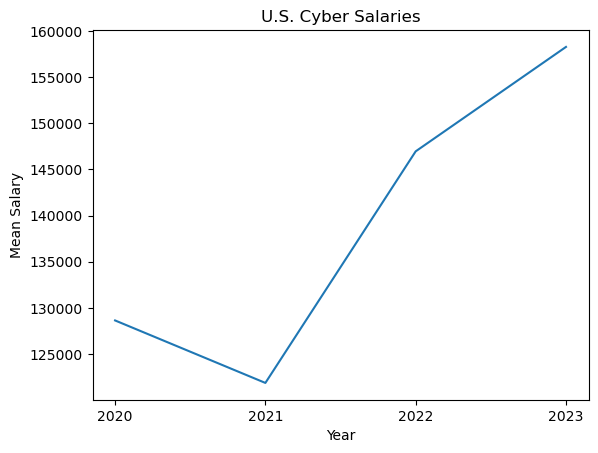

In [57]:
mean_salary_per_year = df.loc[:, ["work_year", "salary"]].groupby("work_year").mean()

x = range(0, len(mean_salary_per_year.index))
y = mean_salary_per_year["salary"]

plt.plot(x, y)
plt.xticks(x, mean_salary_per_year.index)
plt.xlabel("Year")
plt.ylabel("Mean Salary")
plt.title("U.S. Cyber Salaries")

<AxesSubplot: xlabel='employment_type'>

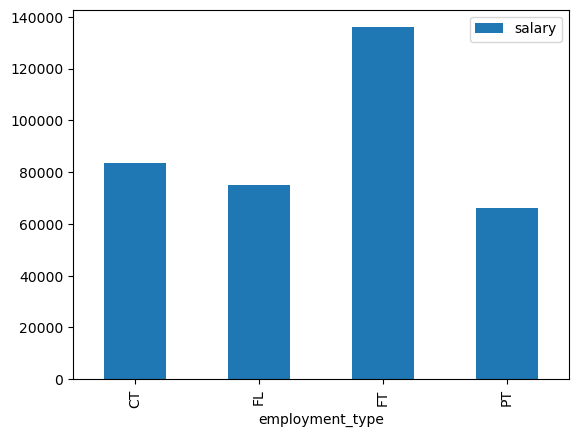

In [71]:
salary_by_employment_type = df.loc[:, ["employment_type", "salary"]].groupby("employment_type").mean()
salary_by_employment_type.plot(kind="bar")

The data set shows that full time employee make the most money in average. But this might be because most of the full time employees are executive?

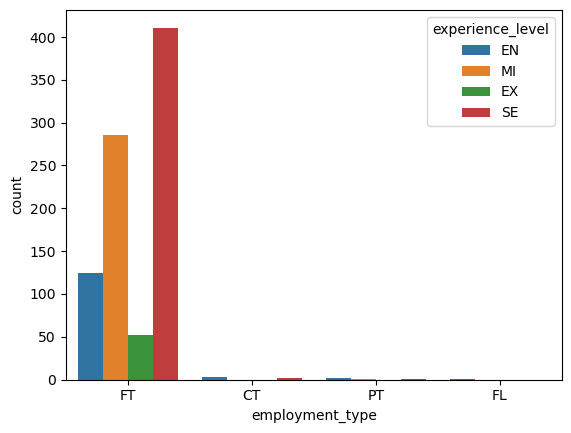

In [72]:
sns.countplot(
    data=df,
    x="employment_type",
    hue="experience_level",
);

There are very few data for Contract, part time and freelance positions, so we should get rid of that data

In [73]:
df_ft = df[ df["employment_type"] == "FT" ]
df_ft.drop("employment_type", inplace=True, axis=1)
df_ft.head()

C:\Users\fahri\AppData\Local\Temp\ipykernel_20576\2285699328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ft.drop("employment_type", inplace=True, axis=1)


,work_year,experience_level,job_title,salary,employee_residence,remote_ratio,company_size
0,2022,EN,Security Manager,63000,US,50,S
1,2022,MI,Security Analyst,95000,US,0,M
2,2022,MI,Security Analyst,70000,US,0,M
5,2022,EX,Security Architect,315000,US,100,L
6,2022,SE,Security Researcher,220000,US,100,M


## Salaries by job title

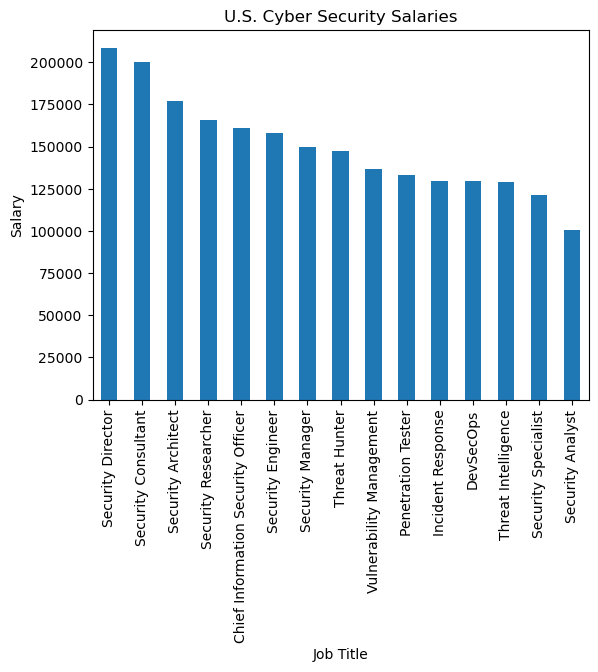

In [59]:
df.loc[:, ["job_title", "salary"]].groupby("job_title").mean().sort_values("salary", ascending=False).plot(kind="bar", xlabel="Job Title", ylabel="Salary", legend=False, title="U.S. Cyber Security Salaries");

## Remote work analysis

In [75]:
df_ft.head()

,work_year,experience_level,job_title,salary,employee_residence,remote_ratio,company_size
0,2022,EN,Security Manager,63000,US,50,S
1,2022,MI,Security Analyst,95000,US,0,M
2,2022,MI,Security Analyst,70000,US,0,M
5,2022,EX,Security Architect,315000,US,100,L
6,2022,SE,Security Researcher,220000,US,100,M


<AxesSubplot: title={'center': 'U.S. Cyber Security Salary'}, xlabel='Remote Ratio', ylabel='Salary in USD'>

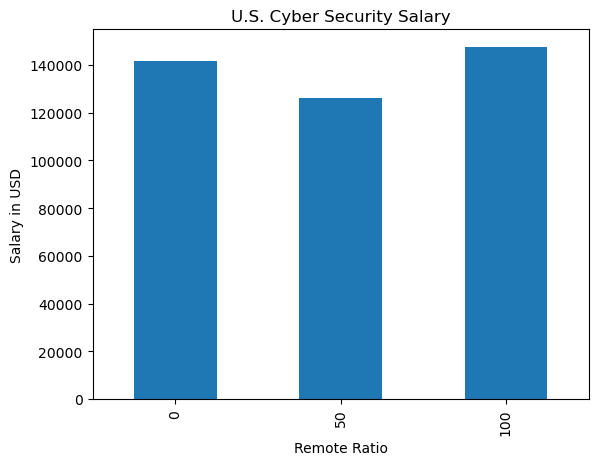

In [31]:
df.loc[:, ["salary", "remote_ratio"]].groupby("remote_ratio").mean().plot(kind="bar", xlabel="Remote Ratio", ylabel="Salary in USD", title="U.S. Cyber Security Salary", legend=False)

<AxesSubplot: xlabel='remote_ratio', ylabel='salary'>

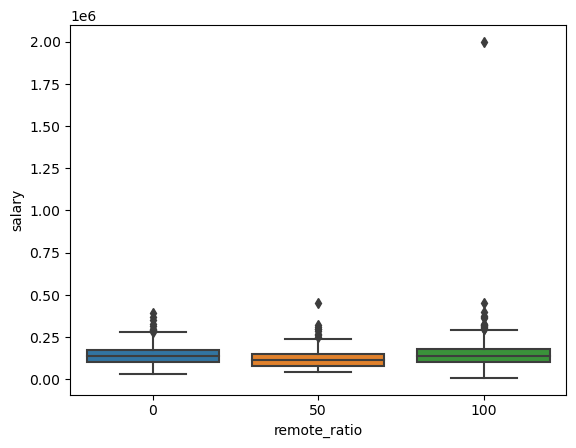

In [29]:
sns.boxplot(
    x = df["remote_ratio"],
    y = df["salary"]
)

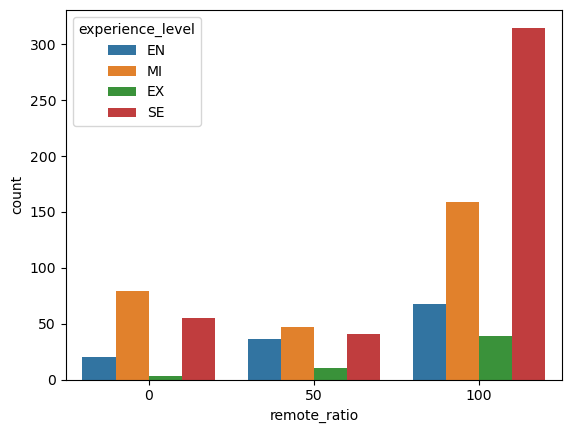

In [77]:
sns.countplot(
    data=df_ft,
    x="remote_ratio",
    hue="experience_level",
);

The first plot shows that a higher remote ratio will result in a higher salary. But this is only because more senior positions, tend to work remote while junior positions have less remote options. 

[Text(0.5, 0, 'Remote Ratio'),
 Text(0, 0.5, 'Salary'),
 Text(0.5, 1.0, 'U.S. Cyber Salaries')]

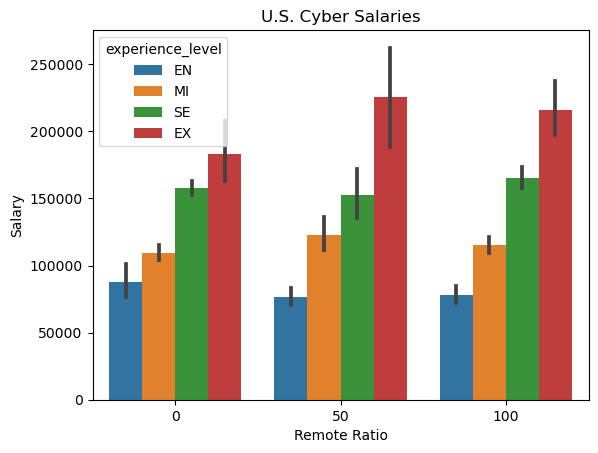

In [35]:
ax = sns.barplot(
    data = df,
    x = "remote_ratio",
    y = "salary",
    hue = "experience_level",
    hue_order = ["EN", "MI", "SE", "EX"]
)
ax.set(xlabel="Remote Ratio", ylabel="Salary", title="U.S. Cyber Salaries")

In [32]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_size
0,2023,MI,FT,Security Analyst,145000,US,0,M
1,2023,MI,FT,Security Analyst,115000,US,0,M
2,2023,SE,FT,DevSecOps,160000,US,0,M
3,2023,SE,FT,DevSecOps,120000,US,0,M
6,2023,SE,FT,Security Specialist,104000,US,100,M


# Experience level

[Text(0.5, 1.0, 'U.S. Cyber Salaries'),
 Text(0.5, 0, 'Experience Level'),
 Text(0, 0.5, 'Salary')]

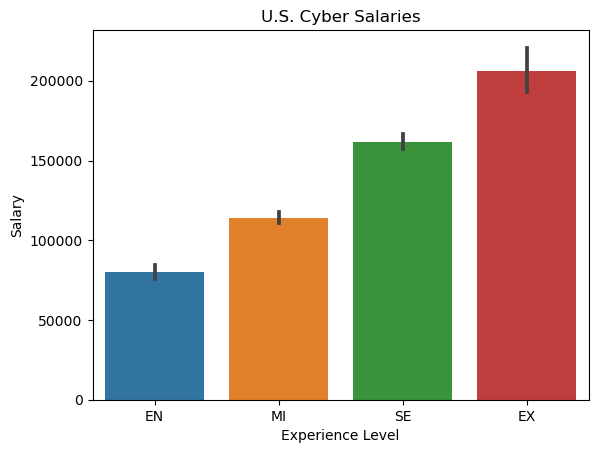

In [46]:
ax = sns.barplot(
    data = df,
    x = "experience_level",
    y = "salary",
    order = ["EN", "MI", "SE", "EX"]
)

ax.set(title = "U.S. Cyber Salaries", xlabel="Experience Level", ylabel="Salary")

# Preparing data for model training

In [79]:
df["experience_level"].value_counts()

SE    414
MI    286
EN    130
EX     52
Name: experience_level, dtype: int64

In [80]:
df["employment_type"].value_counts()

FT    872
CT      5
PT      4
FL      1
Name: employment_type, dtype: int64

In [81]:
df["company_size"].value_counts()

L    554
M    287
S     41
Name: company_size, dtype: int64

In [82]:
df_model = df[ (df["employment_type"] == "FT") ]
df_model.drop("employment_type", axis=1, inplace=True)
df_model.head()

C:\Users\fahri\AppData\Local\Temp\ipykernel_20576\3572843097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.drop("employment_type", axis=1, inplace=True)


,work_year,experience_level,job_title,salary,employee_residence,remote_ratio,company_size
0,2022,EN,Security Manager,63000,US,50,S
1,2022,MI,Security Analyst,95000,US,0,M
2,2022,MI,Security Analyst,70000,US,0,M
5,2022,EX,Security Architect,315000,US,100,L
6,2022,SE,Security Researcher,220000,US,100,M


In [83]:
df_model.drop("employee_residence", axis=1, inplace=True)
df_model.head()

C:\Users\fahri\AppData\Local\Temp\ipykernel_20576\3977629226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.drop("employee_residence", axis=1, inplace=True)


,work_year,experience_level,job_title,salary,remote_ratio,company_size
0,2022,EN,Security Manager,63000,50,S
1,2022,MI,Security Analyst,95000,0,M
2,2022,MI,Security Analyst,70000,0,M
5,2022,EX,Security Architect,315000,100,L
6,2022,SE,Security Researcher,220000,100,M


In [84]:
df_model.drop("work_year", axis=1, inplace=True)
df_model.drop("job_title", axis=1, inplace=True)

C:\Users\fahri\AppData\Local\Temp\ipykernel_20576\2711936871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.drop("work_year", axis=1, inplace=True)
C:\Users\fahri\AppData\Local\Temp\ipykernel_20576\2711936871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.drop("job_title", axis=1, inplace=True)


In [85]:
df_model.head()

,experience_level,salary,remote_ratio,company_size
0,EN,63000,50,S
1,MI,95000,0,M
2,MI,70000,0,M
5,EX,315000,100,L
6,SE,220000,100,M


In [86]:
df_model.loc[:, "experience_level"].value_counts()

SE    411
MI    285
EN    124
EX     52
Name: experience_level, dtype: int64

In [87]:
df_model.loc[:, "remote_ratio"].value_counts()

100    581
0      157
50     134
Name: remote_ratio, dtype: int64

In [88]:
df_model.loc[:, "company_size"].value_counts()

L    547
M    285
S     40
Name: company_size, dtype: int64

In [89]:
df_model.head()

,experience_level,salary,remote_ratio,company_size
0,EN,63000,50,S
1,MI,95000,0,M
2,MI,70000,0,M
5,EX,315000,100,L
6,SE,220000,100,M


In [90]:
# df_model = df_model.join( pd.get_dummies(df_model["experience_level"]) )
# df_model.drop("experience_level", axis=1, inplace=True)

# df_model = df_model.join( pd.get_dummies(df_model["remote_ratio"], prefix="remote_") )
# df_model.drop("remote_ratio", axis=1, inplace=True)

# df_model = df_model.join( pd.get_dummies(df_model["company_size"], prefix="company_size_") )
# df_model.drop("company_size", axis=1, inplace=True)

# df_model.head()

In [91]:
df_model.to_csv("salaries_cyber_model.csv", index=False)

# Correlation Analysis

In [93]:
df["experience_level"].unique()

array(['EN', 'MI', 'EX', 'SE'], dtype=object)

In [94]:
df_corr = df.copy()

In [98]:
experience_levels = {
    "EN": 0,
    "MI": 1,
    "SE": 2,
    "EX": 3,
}

df_corr.loc[:, "experience_level"] = df_corr["experience_level"].apply(lambda x: experience_levels[x])

In [109]:
df_corr = df_corr[df_corr["employee_residence"] == "US"]

In [111]:
df_corr.drop("employee_residence", axis=1, inplace=True)

C:\Users\fahri\AppData\Local\Temp\ipykernel_20576\3608887099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr.drop("employee_residence", axis=1, inplace=True)


In [119]:
remote_ratio = {
    0: 0,
    50: 1,
    100: 2,
}

df_corr.loc[:, "remote_ratio"] = df_corr.loc[:, "remote_ratio"].apply(lambda x: remote_ratio[x])

C:\Users\fahri\AppData\Local\Temp\ipykernel_20576\312855716.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr.loc[:, "remote_ratio"] = df_corr.loc[:, "remote_ratio"].apply(lambda x: remote_ratio[x])


In [121]:
company_size = {
    "S": 0,
    "M": 1,
    "L": 2,
}

df_corr.loc[:, "company_size"] = df_corr.loc[:, "company_size"].apply(lambda x: company_size[x])

In [123]:
df_corr.drop("work_year", axis=1, inplace=True)
df_corr.drop("job_title", axis=1, inplace=True)

In [124]:
df_corr.head()

,experience_level,salary,remote_ratio,company_size
0,0,63000,1,0
1,1,95000,0,1
2,1,70000,0,1
5,3,315000,2,2
6,2,220000,2,1


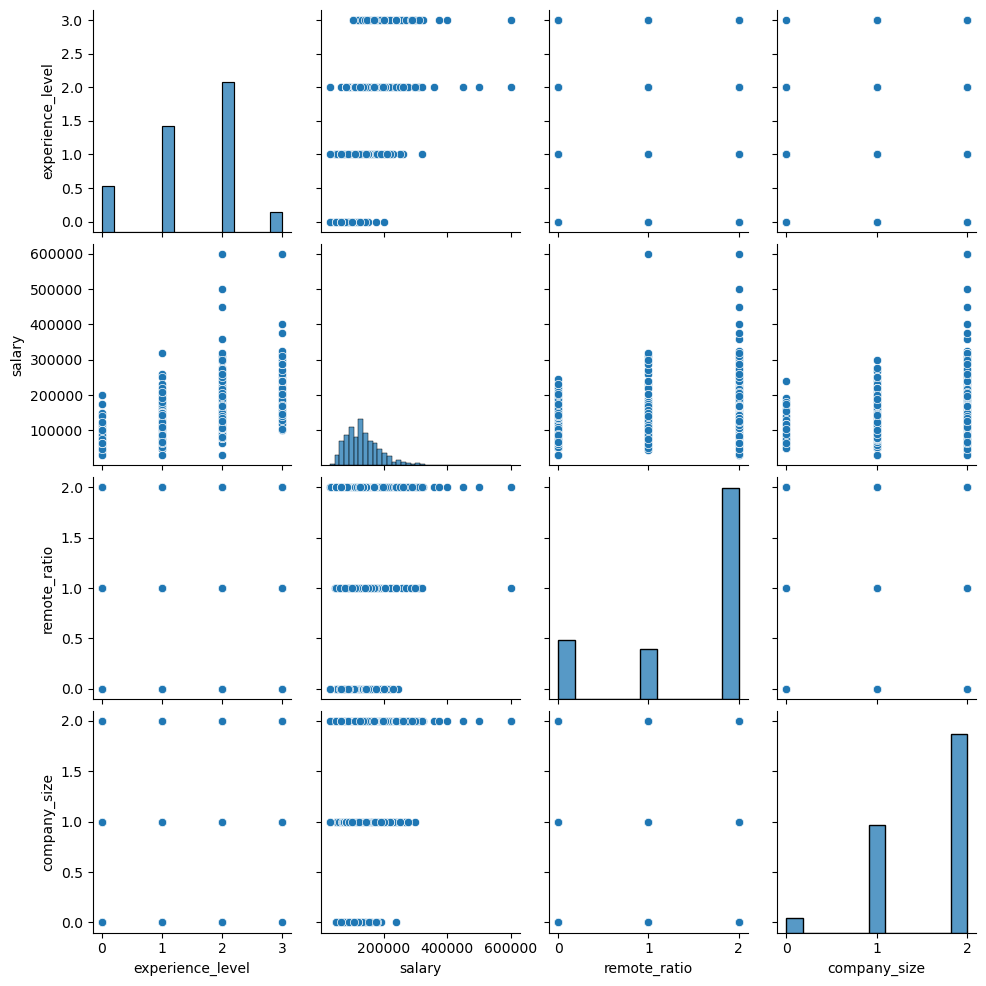

In [125]:
sns.pairplot(df_corr)

It seems like the higher the experience level, the higher the salary. But there are still some outliers. Also the highest salaries are at large companies.

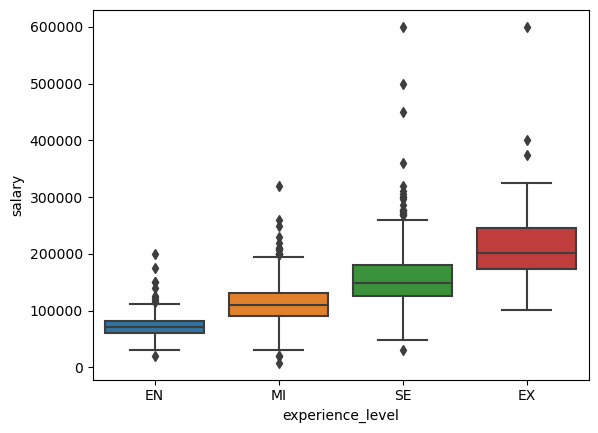

In [128]:
sns.boxplot(
    x=df_ft["experience_level"],
    y=df_ft["salary"],
    order=["EN", "MI", "SE", "EX"]
);

The boxplot shows that a more senior position will receive a higher salary. We can also see that there are many outliers.

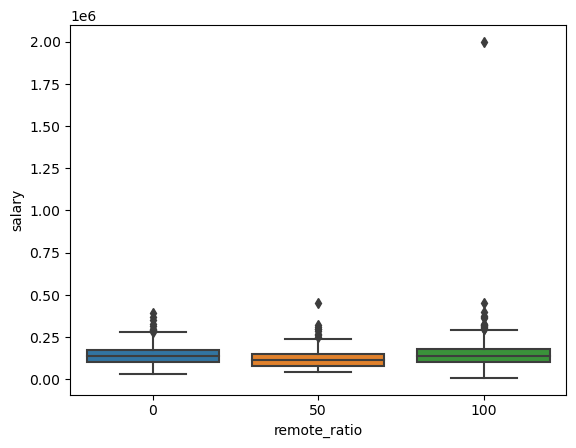

In [8]:
sns.boxplot(
    x=df["remote_ratio"],
    y=df["salary"],
);

The boxplot does not show a clear correlation between a higher salary when working remote. We have already analyzed that more senior employees tend to work more remote (at least in this dataset)

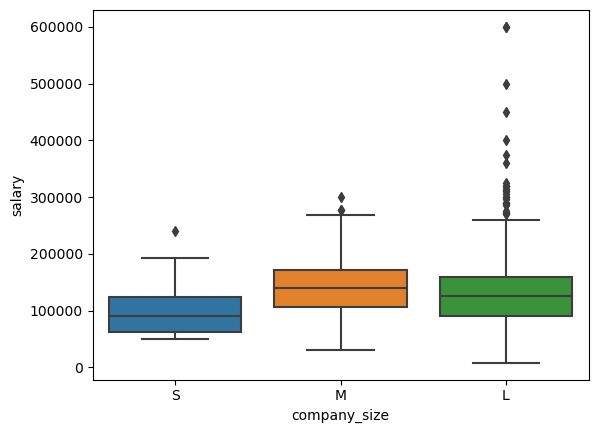

In [131]:
sns.boxplot(
    x=df_ft["company_size"],
    y=df_ft["salary"],
);

There is also no correlation between company size and salary. But the highest salary is payed out on big companies.